<a href="https://colab.research.google.com/github/andresvillamayor/BigData-Pro/blob/main/BigData_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de Big Data 
Andrés Villamayor 
Universidad Comunera

In [1]:
#importando librerias
import pandas as pd 
from  google.colab import drive 

In [2]:
drive.mount("/content/drive")
#montar mi drive para los archivos 


Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/UCOM-BIGDATA/datatweet-07112020-v1.csv", sep="," , engine="python")

In [4]:
data.head()

,id,texto,Fecha,retweet,favorite,dispositivo,codigo_usuario,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario
0,1325000220472709120,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,151214860,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía"
1,1324991828588900352,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,366739674,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay
2,1324972016840151042,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,164378199,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay
3,1324955022631837697,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,77025881,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay
4,1324947182181634048,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,382748730,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay


In [8]:
#usar el texto para (ver el corpus para el analisis de sentimiento)
#importamos la libreria NLTK ( Natural Lenguage Tool Kit)
import nltk
#nltk.download('stopwords') # ya se importo la libreria
#nltk.download('punkt') # ya se importo la libreria

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#importa la libreria de soptwords de nltk 
from nltk.corpus import stopwords
# Initialize the stopwords
stoplist = stopwords.words('spanish')

In [ ]:
# datos de parada - verificacion que este en español 
print(stoplist)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [10]:
# creamos un data frame solo con el texto 
datatexto =  data['texto']
datatexto.head()

0                   RT @hoypy: https://t.co/S7JdHyHoLT
1    RT @FabianCosta1: Entre los 10 fallecidos por ...
2    RT @cinthia_mora: Pablo Herken venció al COVID...
3    RT @FabianCosta1: Entre los 10 fallecidos por ...
4    Entre los 10 fallecidos por covid-19 este vier...
Name: texto, dtype: object

In [11]:
#funcion de limpiar el texto 
#librerias
from string import punctuation
from nltk import word_tokenize

def limpiar_texto (text):
    non_words = list(punctuation)
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    return tokens

In [12]:
#crear una funcion 
#tokenizar los datos 
spanish_stopwords = stopwords.words('spanish')
def valor_token(tokens):
  vector_texto = []
  #normalizacion del texto 
  tokens = [w.lower() for w in tokens]
  tokens =  [w for w in tokens if not w in spanish_stopwords]
  for item in tokens:
        vector_texto.append((item))  
  return vector_texto

In [14]:
# Analizar sentimiento del corpus 
#!pip install spanish-sentiment-analysis
#Libreria de Analisis de Sentimiento  https://pypi.org/project/spanish-sentiment-analysis   ( creado por Elliot Hofman 2018)
from classifier import SentimentClassifier
#crear una funcion 
def analizar(cadena_texto):
  clf = SentimentClassifier()
  valor = clf.predict(cadena_texto)
  #print (cadena_texto,valor) 
  return valor

     |████████████████████████████████| 15.8MB 299kB/s 
     |████████████████████████████████| 276kB 41.9MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=861491 sha256=09733d2ba6bafd1a60e73dab0b9431b20663244381b9f973983a7962e52645e0
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [15]:
resultado_valor=[]
for tweet in datatexto:
  datos_limpios = limpiar_texto(tweet)
  datos_tokenizados = valor_token (datos_limpios)
  #print(datos_tokenizados)
  cadena_valor = ' '.join([str(elem) for elem in datos_tokenizados])
  #print (cadena_valor)
  #analizar sentimiento del corpus 
  valor = analizar(cadena_valor)
  resultado_valor.append(valor)  
  #print (resultado_valor)

#agregar al data frame original el valor del Analisis del Corpus 
print ('======================== Fin del proceso de Analisis ==================')


======================== Fin del proceso de Analisis ==================


In [16]:
#Se agrega la columan Pre = Prediccion del Analisis de Sentimiento al Data Frame original "data"
data['Pre'] = resultado_valor
#impimir data frame 
data.head()

,id,texto,Fecha,retweet,favorite,dispositivo,codigo_usuario,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre
0,1325000220472709120,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,151214860,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía",0.541333
1,1324991828588900352,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,366739674,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay,0.403962
2,1324972016840151042,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,164378199,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay,0.493964
3,1324955022631837697,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,77025881,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay,0.403962
4,1324947182181634048,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,382748730,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay,0.403962


In [17]:
#verificar los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       100 non-null    int64  
 1   texto                    100 non-null    object 
 2   Fecha                    100 non-null    object 
 3   retweet                  100 non-null    int64  
 4   favorite                 100 non-null    int64  
 5   dispositivo              99 non-null     object 
 6   codigo_usuario           100 non-null    int64  
 7   alias_de_usuario         100 non-null    object 
 8   nombre_usuario           100 non-null    object 
 9   fecha_de_usuario         100 non-null    object 
 10  descripcion_del_usuario  89 non-null     object 
 11  seguidores_de_usuario    100 non-null    int64  
 12  amigos_de_usuario        100 non-null    int64  
 13  origen_usuario           79 non-null     object 
 14  Pre                      10

Verificar los Datos para normalizacion 
Uso de Lablel Encoder 
Eliminacion de Columnas que no aportan 


In [18]:
# Revision de los datos 
# Borrar los campos de id 
# Borrar el codigo de usuario  se tiene su nombre y su alias 
data.drop(['id','codigo_usuario'],axis = 'columns',inplace = True)
data.head()

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía",0.541333
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay,0.403962
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay,0.493964
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay,0.403962
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay,0.403962


In [21]:
#cacular hace cuanto tiempo usa twitter el usuario 
#libreria 
import numpy as np
#
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['fecha_de_usuario'] = pd.to_datetime(data['fecha_de_usuario'])
data['Tiempo'] = ((data['Fecha']-data['fecha_de_usuario'])/np.timedelta64(1,'Y')).astype(int)
data.head()

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre,Tiempo
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,Twitter for iPhone,ccentenoc,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,"Granada, Andalucía",0.541333,10
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,Twitter for Android,inesverag,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,Ñemby-Paraguay,0.403962,9
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,Twitter for Android,AroRojas,AROLITO,2010-07-08 18:45:13,NaN,155,933,Asuncion - Paraguay,0.493964,10
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,Twitter for iPhone,robcantero,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,Asunción - Paraguay,0.403962,11
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,Twitter for Android,FabianCosta1,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,Lambare Paraguay,0.403962,9


In [44]:
#Uso de Lablel Encoder 
#importamos libreria 
from sklearn import preprocessing

#codificacion
#dispositivo 
leDispositivo  = preprocessing.LabelEncoder()
data['dispositivo'] = leDispositivo.fit_transform(data['dispositivo'].astype(str))
#origen usuario
leOrigen_usuario  = preprocessing.LabelEncoder()
data['origen_usuario'] = leOrigen_usuario.fit_transform(data['origen_usuario'].astype(str))

leAliasdeusuario = preprocessing.LabelEncoder()
data['alias_de_usuario'] = leAliasdeusuario.fit_transform(data['alias_de_usuario'].astype(str))

data.head()

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre,Tiempo,Final
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,6,38,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,27,0.541333,10,1
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,5,48,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,17,0.403962,9,0
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,5,23,AROLITO,2010-07-08 18:45:13,NaN,155,933,0,0.493964,10,0
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,6,71,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,19,0.403962,11,0
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,5,5,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,28,0.403962,9,0


In [45]:
# verificar la inversa del Label Encoder
leDispositivo.inverse_transform(data['dispositivo'])  
# 2 Android 
# 1 Web App de Twitter
# 3 IPhone 
# 0 TeetDeck

array(['6', '5', '5', '6', '5', '5', '6', '6', '5', '5', '5', '5', '4',
       '5', '5', '5', '4', '4', '4', '5', '5', '5', '5', '5', '6', '5',
       '5', '5', '5', '5', '5', '6', '5', '5', '5', '5', '5', '6', '4',
       '5', '5', '5', '5', '5', '5', '7', '4', '5', '1', '5', '6', '5',
       '4', '5', '5', '4', '6', '4', '5', '4', '1', '4', '4', '6', '5',
       '6', '4', '5', '5', '4', '4', '5', '1', '1', '5', '4', '5', '0',
       '5', '5', '6', '5', '4', '5', '5', '5', '3', '1', '6', '4', '4',
       '5', '3', '5', '5', '5', '2', '5', '5', '5'], dtype=object)

In [46]:
# Colocar los valores Buenos y Malos dentro del Data Frame 
# Dependiendo del valor de Pre
final = []
#Valor 0 =  Sentimiento NEGATIVO
#Valor 1 =  Sentimiento POSITIVO
for resultado in  data['Pre']:
  if resultado <= 0.5:
    x = 0
    final.append(x)
  else:
    x = 1
    final.append(x)

#Agregamos la columna Target al Data Frame 
data['Final'] = final
data

,texto,Fecha,retweet,favorite,dispositivo,alias_de_usuario,nombre_usuario,fecha_de_usuario,descripcion_del_usuario,seguidores_de_usuario,amigos_de_usuario,origen_usuario,Pre,Tiempo,Final
0,RT @hoypy: https://t.co/S7JdHyHoLT,2020-11-07 09:00:44,4,0,6,38,Carlos Centeno,2010-06-02 22:11:59,Periodista inconformista | Divulgo las investi...,2619,1859,27,0.541333,10,1
1,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 08:27:23,2,0,5,48,Inés Vera,2011-09-02 18:44:16,Propietaria y Conductora de @noticias_atp por ...,209,427,17,0.403962,9,0
2,RT @cinthia_mora: Pablo Herken venció al COVID...,2020-11-07 07:08:40,14,0,5,23,AROLITO,2010-07-08 18:45:13,NaN,155,933,0,0.493964,10,0
3,RT @FabianCosta1: Entre los 10 fallecidos por ...,2020-11-07 06:01:08,2,0,6,71,ᖇOB CᗩᑎTEᖇO,2009-09-24 19:47:59,#Fotógrafo #SocialMedia #Corresponsal de #Para...,5048,1784,19,0.403962,11,0
4,Entre los 10 fallecidos por covid-19 este vier...,2020-11-07 05:29:59,2,2,5,5,Fabian Costa,2011-09-30 16:25:22,Periodista. Papá de tres hermosos pequeños.\nD...,7418,905,28,0.403962,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RT @LaNacionPy: Los italianos tendrán que resp...,2020-11-06 22:20:15,8,0,5,64,Max Power🇵🇾,2010-05-07 02:39:29,Si te vienen a contar cositas malas de mi dil...,114,1458,14,0.739599,10,1
96,"""El mundo entero"" se abrió para Lisett cuando ...",2020-11-06 22:17:35,1,6,2,10,Diario La Nación,2010-07-13 19:22:08,"Información, análisis y opinión hace 25 años.\...",325302,438,5,0.769007,10,1
97,RT @eltruenopy: 📍La meseta de casos positivos ...,2020-11-06 22:12:21,3,0,5,3,𝑹𝒐𝒅𝒐𝒍𝒇𝒐 𝑮𝒐𝒏𝒛á𝒍𝒆𝒛 𝑯. 2️⃣3️⃣,2010-10-05 17:00:35,"𝑷𝒂𝒓𝒂𝒈𝒖𝒂𝒚𝒐, 𝑺𝒂𝒏𝑴𝒊𝒈𝒖𝒆𝒍𝒊𝒏𝒐 𝒚 𝑶𝒍𝒊𝒎𝒑𝒊𝒔𝒕𝒂. 𝑷𝒆𝒓𝒊𝒐𝒅𝒊𝒔𝒕...",9628,1484,5,0.354593,10,0
98,RT @LaNacionPy: Los italianos tendrán que resp...,2020-11-06 22:11:58,8,0,5,9,KDIRRA,2015-05-20 04:24:49,Rodéate siempre de personas que te van a desaf...,506,3220,1,0.739599,5,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   texto                    100 non-null    object        
 1   Fecha                    100 non-null    datetime64[ns]
 2   retweet                  100 non-null    int64         
 3   favorite                 100 non-null    int64         
 4   dispositivo              100 non-null    int64         
 5   alias_de_usuario         100 non-null    object        
 6   nombre_usuario           100 non-null    object        
 7   fecha_de_usuario         100 non-null    datetime64[ns]
 8   descripcion_del_usuario  89 non-null     object        
 9   seguidores_de_usuario    100 non-null    int64         
 10  amigos_de_usuario        100 non-null    int64         
 11  origen_usuario           100 non-null    int64         
 12  Pre                      100 non-null

kMeans  - Cluster Model

In [49]:
#librerias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import  preprocessing
#seleccion de datos 

df = data [['retweet'],['favorite'],]
df1 = data.iloc[:,2:3] #retweet
df2 = data.iloc[:,3:4] #favorito
df3 = data.iloc[:,4:5] #dispositivo
df4 = data.iloc[:,9:10] #seguidores 
df5 = data.iloc[:,10:11] # amigos 
df6 = data.iloc[:,13:14] # Tiempo de que usa Twitter
df7 = data.iloc[:,14:15] # Target
df = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   retweet                100 non-null    int64
 1   favorite               100 non-null    int64
 2   dispositivo            100 non-null    int64
 3   seguidores_de_usuario  100 non-null    int64
 4   amigos_de_usuario      100 non-null    int64
 5   Tiempo                 100 non-null    int64
 6   Final                  100 non-null    int64
dtypes: int64(7)
memory usage: 5.6 KB


In [50]:
# One hot encoding para las variables 
x = pd.get_dummies(df)
print (x) 

    retweet  favorite  dispositivo  ...  amigos_de_usuario  Tiempo  Final
0         4         0            6  ...               1859      10      1
1         2         0            5  ...                427       9      0
2        14         0            5  ...                933      10      0
3         2         0            6  ...               1784      11      0
4         2         2            5  ...                905       9      0
..      ...       ...          ...  ...                ...     ...    ...
95        8         0            5  ...               1458      10      1
96        1         6            2  ...                438      10      1
97        3         0            5  ...               1484      10      0
98        8         0            5  ...               3220       5      1
99        3         0            5  ...                341       7      0

[100 rows x 7 columns]


In [51]:
#Normalizacion  de datos [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(x.values))
xNorm.head()

,0,1,2,3,4,5,6
0,0.070175,0.000000,0.857143,0.002530,0.156971,0.909091,1.0
1,0.035088,0.000000,0.714286,0.000202,0.035533,0.818182,0.0
2,0.245614,0.000000,0.714286,0.000150,0.078443,0.909091,0.0
3,0.035088,0.000000,0.857143,0.004877,0.150611,1.000000,0.0
4,0.035088,0.076923,0.714286,0.007167,0.076069,0.818182,0.0


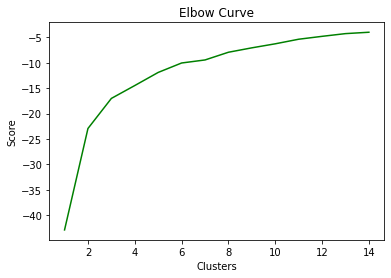

In [53]:
#Curva de Elbow 
nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(xNorm).score(xNorm) for i in range(len(kmeans))]
#impresion de la Curva 
plt.plot(nc, score, color='green') 
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [55]:
#Modelo 
kmeans = KMeans(n_clusters=14, max_iter=300, random_state=1)
kmeans.fit(xNorm)
print("Score: " + str(kmeans.score(xNorm)))
print(kmeans.labels_)
print(kmeans.cluster_centers_)

Score: -3.9452375176594368
[ 9  4  4  4  4  3  4  9  4  3  3 12  2 12  0 12  0  0  8  9  4  9  3  2
  9  2  3  4  3  2  3  4  3  2  3  4  3  4  5  1 10  3  2  3  9  3  6  4
  8  4  4  4  1  1  3  8  4  0  9 13 11  1  3  4  8  4  3  4  4  6  4  4
 11 11  3  0  2  7  3  4  9  4  1  0  4  8  1 11  0  8  0  0  1  8  0  9
 13  4  2  3]
[[3.15789474e-02 2.30769231e-02 6.57142857e-01 4.36292250e-04
  5.38670285e-02 2.72727273e-02 0.00000000e+00]
 [1.75438596e-02 1.48351648e-01 5.71428571e-01 2.69821334e-01
  1.87403082e-01 8.44155844e-01 0.00000000e+00]
 [1.00877193e-01 6.93889390e-18 6.96428571e-01 1.90467266e-03
  1.64698524e-01 4.77272727e-01 1.00000000e+00]
 [7.84856879e-02 3.23886640e-02 7.14285714e-01 2.73224183e-03
  6.22009569e-02 4.92822967e-01 5.55111512e-17]
 [7.62483131e-02 7.39644970e-03 7.52747253e-01 1.05303030e-02
  1.12915536e-01 8.74125874e-01 1.66533454e-16]
 [1.05263158e-01 1.00000000e+00 5.71428571e-01 5.96568788e-03
  1.00067843e-02 4.54545455e-01 0.00000000e+00]
 [7.017

In [ ]:
clusters = pd.DataFrame(min_max_scaler.inverse_transform(kmeans.cluster_centers_), columns=x.columns)
clusters[''] = clusters['tiene_ips'].round()
clusters['cliente_nuevo_o_recurrente_N'] = clusters['cliente_nuevo_o_recurrente_N'].round()
clusters['cliente_nuevo_o_recurrente_R'] = clusters['cliente_nuevo_o_recurrente_R'].round()
clusters['resultadoFinal_BIEN'] = clusters['resultadoFinal_BIEN'].round()
clusters['resultadoFinal_MAL'] = clusters['resultadoFinal_MAL'].round()

Utilizando SVM MODEL  

In [40]:
#libreria 
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

#seleccion de datos 
df1 = data.iloc[:,2:3] #retweet
df2 = data.iloc[:,3:4] #favorito
df3 = data.iloc[:,4:5] #dispositivo
df4 = data.iloc[:,9:10] #seguidores 
df5 = data.iloc[:,10:11] # amigos 
df6 = data.iloc[:,13:14] # Tiempo de que usa Twitter
df7 = data.iloc[:,14:15] # Target
df = pd.concat([df6], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Tiempo  100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [42]:
# Resultado Final 
y = df7  # 1 Positivo  0 Negativo 
#print (y)
#Se usan todas las variables 
X= df6  #Tiempo que usa 
#X = df.iloc[:,0:5]
#print (X)
# Split en train y test  ( se toma los datos de la misma semilla - random_state = 1 , el 30 % de los datos son para entrenamiento test_size = 0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state = 1)

# Normalizacion a [0-1]
min_max_scaler_train = preprocessing.MinMaxScaler()
xNormTrain = pd.DataFrame(min_max_scaler_train.fit_transform(X_train.values))
min_max_scaler_test = preprocessing.MinMaxScaler()
xNormTest = pd.DataFrame(min_max_scaler_test.fit_transform(X_test.values))
#print (X_train.values)
#print (X_test.values)

#Ceracion de Clasificacion SVM 
clf = svm.SVC(kernel='rbf', max_iter=2000, probability=1) # kernel={linear, rbf, poly, sigmoid}
#Train the model using the training sets
clf.fit(xNormTrain, y_train)

#Y Predicho 
y_pred = clf.predict(xNormTest)

print("\nTrain Score:",clf.score(xNormTrain, y_train))
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.precision_recall_fscore_support(y_test, y_pred, average=None)


Train Score: 0.6857142857142857

Accuracy: 0.8333333333333334


(array([0.83333333, 0.        ]),
 array([1., 0.]),
 array([0.90909091, 0.        ]),
 array([25,  5]))

In [28]:
# Calcular matriz de confusion
pd.crosstab(y_test, y_pred, 
            rownames=['actual'], 
            colnames=['pred'], margins=False, margins_name="Total")

pred,0
actual,
0,25
1,5


In [ ]:
# Obtener scores de clasificación en las clases 0 o 1
y_scores = clf.predict_proba(xNormTest)

# Crear dataframe de predicciones con scores, filtrar segun criterio de aprobacion (80%)
dp = pd.DataFrame(zip(y_test,y_pred,y_scores[:,0],y_scores[:,1]), columns=['actual','pred','prob_yes','prob_no'])
dp

,actual,pred,prob_yes,prob_no
0,0,0,0.876959,0.123041
1,1,0,0.778314,0.221686
2,0,0,0.715945,0.284055
3,0,0,0.807796,0.192204
4,0,0,0.838123,0.161877
5,0,0,0.744660,0.255340
6,0,0,0.709900,0.290100
7,0,0,0.721189,0.278811
8,0,0,0.877887,0.122113
9,0,0,0.923165,0.076835


0.5


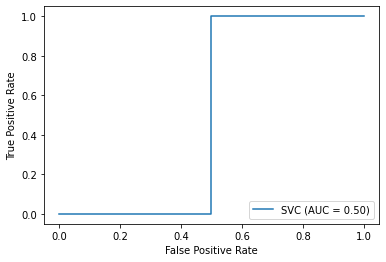

In [ ]:
# ROC Curve
import numpy as np
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_scores[:,1]))
metrics.plot_roc_curve(clf, xNormTest, y_test)

Utilizando el kMeans Model
